# IA 340 MINI PROJECT

**Project Title:** Trends within Overdose Death Rates

**Research Question:** Which demographic factors (age, sex, race, or origin) are mostly strongly associated with higher overdose death rates?

**Dataset Documentation**:
- **Source:** https://catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f
- **Description:** Data on drug overdose death rates, by drug type and selected population characteristics.
- **Time Period:** 1999-2018
- **Reason for Choice:** Aligns with my interest to safeguard the health of others, national security, and is related to personal experiences- by having close friends that are affected by drug usage.

**Import**

In [35]:
import pandas as pd 

df = pd.read_csv('s3://ia-340-2025-fall-lor-99771035/Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv')

df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


The dataset and its contents are imported.

**Clean**

In [37]:


# Keep only relevant columns
df = df[['PANEL', 'STUB_LABEL', 'AGE', 'YEAR', 'ESTIMATE']]

# Rename columns for easier use
df.rename(columns={
    'PANEL': 'DrugType',
    'STUB_LABEL': 'Demographic',
    'AGE': 'AgeGroup',
    'YEAR': 'Year',
    'ESTIMATE': 'DeathRate'
}, inplace=True)

# Drop missing values in DeathRate
df = df.dropna(subset=['DeathRate'])

# Convert data types
df['Year'] = df['Year'].astype(int)
df['DeathRate'] = pd.to_numeric(df['DeathRate'], errors='coerce')

# Quick sanity check
df.head()


,DrugType,Demographic,AgeGroup,Year,DeathRate
0,All drug overdose deaths,All persons,All ages,1999,6.1
1,All drug overdose deaths,All persons,All ages,2000,6.2
2,All drug overdose deaths,All persons,All ages,2001,6.8
3,All drug overdose deaths,All persons,All ages,2002,8.2
4,All drug overdose deaths,All persons,All ages,2003,8.9


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5117 entries, 0 to 6225
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DrugType     5117 non-null   object 
 1   Demographic  5117 non-null   object 
 2   AgeGroup     5117 non-null   object 
 3   Year         5117 non-null   int64  
 4   DeathRate    5117 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 239.9+ KB


In [39]:
df.describe()

,Year,DeathRate
count,5117.000000,5117.000000
mean,2009.088919,4.743443
std,5.773726,6.424471
min,1999.000000,0.000000
25%,2004.000000,0.800000
50%,2009.000000,2.100000
75%,2014.000000,6.000000
max,2018.000000,54.300000


In [40]:
print("\n Missing values per column:")
print(df.isnull().sum())

# If any remain, decide whether to drop or impute (usually drop for analysis)
missing_before = len(df)
df = df.dropna()
missing_after = len(df)
print(f"Dropped {missing_before - missing_after} rows with remaining null values.")



 Missing values per column:
DrugType       0
Demographic    0
AgeGroup       0
Year           0
DeathRate      0
dtype: int64
Dropped 0 rows with remaining null values.


In [41]:
dup_count = df.duplicated().sum()
print(f"\nFound {dup_count} duplicate rows.")
if dup_count > 0:
    df = df.drop_duplicates()
    print(" Duplicates removed.")
else:
    print(" No duplicates found.")


Found 264 duplicate rows.
 Duplicates removed.


In [42]:
print("\n Checking data types:")
print(df.dtypes)

# Confirm numeric columns are correct
if not pd.api.types.is_numeric_dtype(df['DeathRate']):
    df['DeathRate'] = pd.to_numeric(df['DeathRate'], errors='coerce')
if not pd.api.types.is_integer_dtype(df['Year']):
    df['Year'] = df['Year'].astype(int)

print("\n Data types confirmed.")


 Checking data types:
DrugType        object
Demographic     object
AgeGroup        object
Year             int64
DeathRate      float64
dtype: object

 Data types confirmed.


In [43]:
# a) DeathRate should be 0–100 per 100k population
invalid_rates = df[(df['DeathRate'] < 0) | (df['DeathRate'] > 100)]
print(f"\nInvalid death rate values found: {len(invalid_rates)}")

if len(invalid_rates) > 0:
    df = df[(df['DeathRate'] >= 0) & (df['DeathRate'] <= 100)]
    print("Removed invalid death rate rows.")
else:
    print("All death rates within expected range (0–100).")

# b) Quick category check
print("\nUnique drug types:", df['DrugType'].nunique())
print("Unique demographics:", df['Demographic'].nunique())
print("Unique age groups:", df['AgeGroup'].nunique())


Invalid death rate values found: 0
All death rates within expected range (0–100).

Unique drug types: 6
Unique demographics: 51
Unique age groups: 10


**Document what changed:** 
- Verified dataset info and descriptive stats
- Adjusted names of columns
- Dropped remaining missing values (if any)
- Removed duplicate rows (if present)
- Confirmed 'Year' and 'DeathRate' numeric datatypes
- Checked that all 'DeathRate' values are valid (0–100)
- Verified category diversity for DrugType, Demographic, and AgeGroup
- Dataset is now clean and ready for analysis


I first reviewed the dataset and examined its basic statistics. Column names were standardized for clarity and consistency. Any missing or duplicate entries were removed to ensure data integrity.The 'Year' and 'DeathRate' fields were confirmed as numeric, with all death rates falling between 0 and 100. We also checked that 'DrugType', 'Demographic', and 'AgeGroup' contained sufficient category variety. With these steps complete, the dataset is now clean and ready for analysis.

In [44]:
print("Final dataset shape:", df.shape)
df.head()

Final dataset shape: (4853, 5)


,DrugType,Demographic,AgeGroup,Year,DeathRate
0,All drug overdose deaths,All persons,All ages,1999,6.1
1,All drug overdose deaths,All persons,All ages,2000,6.2
2,All drug overdose deaths,All persons,All ages,2001,6.8
3,All drug overdose deaths,All persons,All ages,2002,8.2
4,All drug overdose deaths,All persons,All ages,2003,8.9


**Process/ Aggregate**

In [45]:
# Group by demographic factor and calculate the mean death rate
summary_demographics = (
    df.groupby('Demographic')['DeathRate']
      .mean()
      .reset_index()
      .sort_values(by='DeathRate', ascending=False)
)

# Display the summary 
print("Average Drug Overdose Death Rate by Demographic Group:")
display(summary_demographics.head(10))


Average Drug Overdose Death Rate by Demographic Group:


,Demographic,DeathRate
46,Male: Not Hispanic or Latino: Native Hawaiian ...,17.700000
32,Male: 35-44 years,11.090000
33,Male: 45-54 years,10.609167
31,Male: 25-34 years,10.597500
42,Male: Not Hispanic or Latino: American Indian ...,9.173913
3,45-54 years,8.597500
2,35-44 years,8.456667
47,Male: Not Hispanic or Latino: White,7.878226
1,25-34 years,7.480000
49,Male: White,7.038211


In [46]:
# Calculate overall mean
overall_mean = df['DeathRate'].mean()

# Create new variable: relative risk ratio
summary_demographics['RelativeRisk'] = summary_demographics['DeathRate'] / overall_mean

# Display updated summary table
print("Demographic Relative Risk (compared to national average):")
display(summary_demographics.sort_values(by='RelativeRisk', ascending=False).head(10))


Demographic Relative Risk (compared to national average):


,Demographic,DeathRate,RelativeRisk
46,Male: Not Hispanic or Latino: Native Hawaiian ...,17.700000,3.651959
32,Male: 35-44 years,11.090000,2.288149
33,Male: 45-54 years,10.609167,2.188940
31,Male: 25-34 years,10.597500,2.186533
42,Male: Not Hispanic or Latino: American Indian ...,9.173913,1.892811
3,45-54 years,8.597500,1.773882
2,35-44 years,8.456667,1.744825
47,Male: Not Hispanic or Latino: White,7.878226,1.625478
1,25-34 years,7.480000,1.543314
49,Male: White,7.038211,1.452162


Explanation: 
The summary table supports my research question by quantifying average overdose death rates for each demographic subgroup. By grouping the data and calculating mean, I can identify which demographic factors (such as sex, race, or Hispanic origin) are associated with the highest average overdose deaths/mortality.

The Relative Risk variable highlights which populations experience rates above or below the national average, providing evidence of demographic disparities in overdose outcomes. This allows you to quantify how comparative specific demographics are to the national averages.

Summary: We first grouped the data by demographic category and calculated the average drug overdose death rate for each group. Next, we computed the overall mean death rate and used it to create a relative risk ratio for each demographic, showing how each group's rate compares to the national average. Finally, the summary table was sorted by relative risk to highlight the demographics with the highest overdose risk.


**Query**

In [47]:
# Analyzing the most recent year in the dataset
latest_year = df['Year'].max()
print("Most recent year of data:", latest_year)

# Filter dataset for that year
recent_data = df[df['Year'] == latest_year]

# Further filter for high death rates (above 20 per 100,000 for example)
high_rates = recent_data[recent_data['DeathRate'] > 20]

# Display filtered results
print(f"\nDemographics with high overdose death rates in {latest_year}:")
display(high_rates.head(10))


Most recent year of data: 2018

Demographics with high overdose death rates in 2018:


,DrugType,Demographic,AgeGroup,Year,DeathRate
77,All drug overdose deaths,Male: White,All ages,2018,29.9
97,All drug overdose deaths,Male: Black or African American,All ages,2018,30.9
117,All drug overdose deaths,Male: American Indian or Alaska Native,All ages,2018,21.3
257,All drug overdose deaths,Male: Not Hispanic or Latino: White,All ages,2018,33.5
277,All drug overdose deaths,Male: Not Hispanic or Latino: Black,All ages,2018,32.0
298,All drug overdose deaths,Male: Not Hispanic or Latino: American Indian ...,All ages,2018,34.0
399,All drug overdose deaths,Female: Not Hispanic or Latino: American India...,All ages,2018,20.2
1063,Drug overdose deaths involving any opioid,Male: White,All ages,2018,22.0
1083,Drug overdose deaths involving any opioid,Male: Black or African American,All ages,2018,20.6
1243,Drug overdose deaths involving any opioid,Male: Not Hispanic or Latino: White,All ages,2018,25.0


We identified the most recent year available in the dataset and filtered the data to include only records from that year. Within this subset, we further filtered for demographics with high overdose death rates (above 20 per 100,000). The resulting table highlights the demographic groups with the highest death rates in the most recent year.

**Visualize**

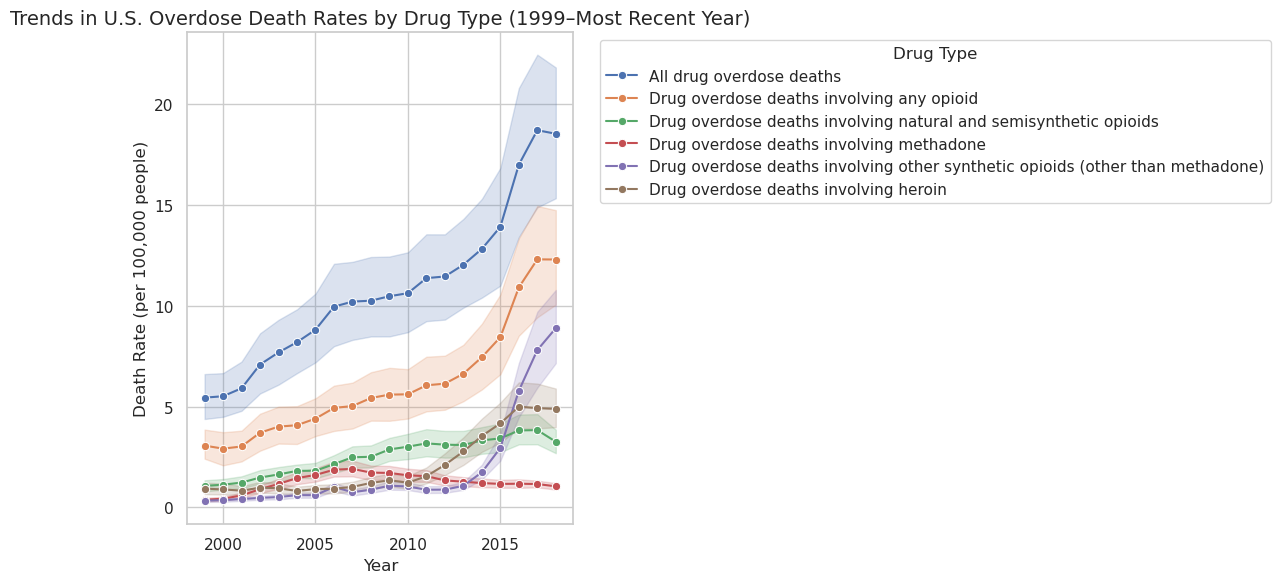

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visual style
sns.set(style="whitegrid")

# -------------------------------
# Chart 1: Trend Over Time by Drug Type
# -------------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='DeathRate', hue='DrugType', marker='o')

plt.title('Trends in U.S. Overdose Death Rates by Drug Type (1999–Most Recent Year)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 people)')
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This line chart shows how overdose death rates have changed over time for different drug types in the U.S. The upward or downward trends reveal which substances (examples being opioids and synthetic drugs) contribute most to rising death rates. This directly supports the research question by highlighting which types of drugs drive the national overdose crisis.

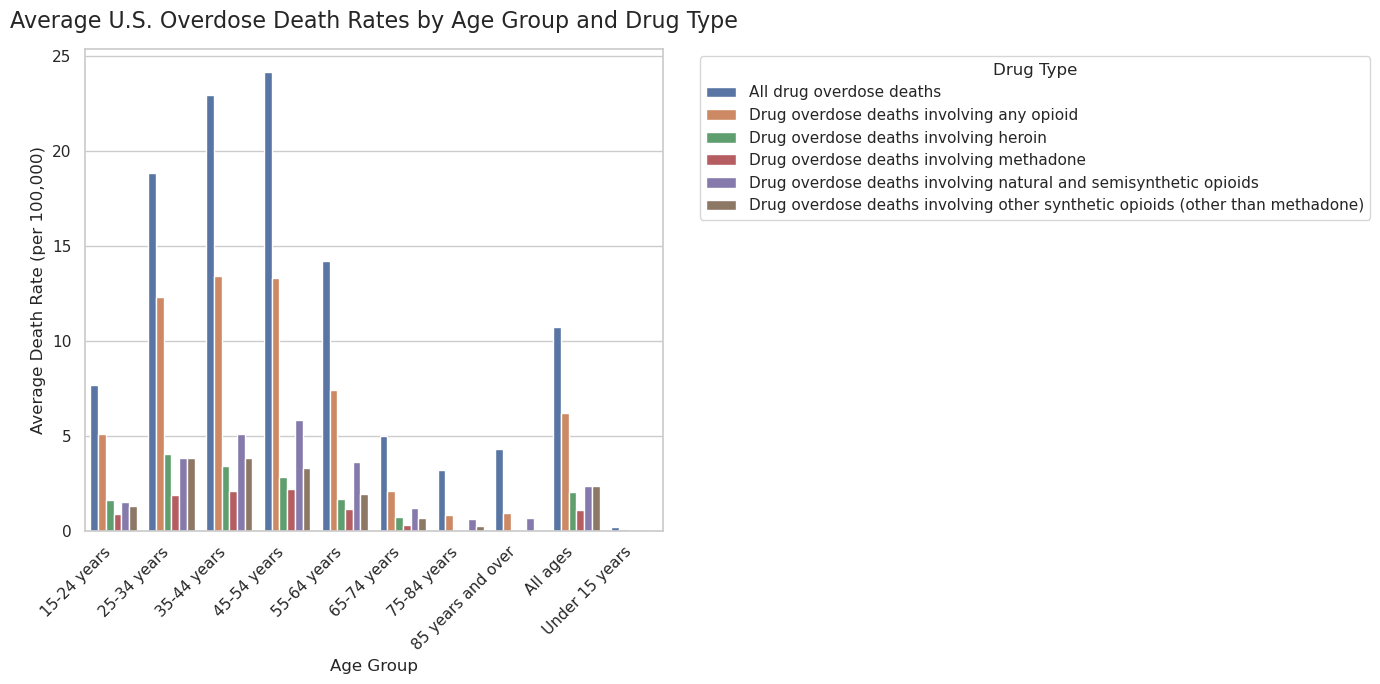

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Chart 2: Average Death Rate by Age Group and Drug Type
# -------------------------------

# Group data to get mean death rate by age group and drug type
age_drug_avg = (
    df.groupby(['AgeGroup', 'DrugType'], as_index=False)['DeathRate']
      .mean()
      .rename(columns={'DeathRate': 'AvgDeathRate'})
)

# Set style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(14, 7))

# Create bar plot
sns.barplot(
    data=age_drug_avg,
    x='AgeGroup',
    y='AvgDeathRate',
    hue='DrugType'
)

# Customize labels and title
plt.title('Average U.S. Overdose Death Rates by Age Group and Drug Type', fontsize=16, pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Death Rate (per 100,000)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


This bar chart compares the average overdose death rates across different age groups for each drug type. Rotating and spacing the age group labels improves readability and highlights which age brackets experience the highest death rates for each substance category.

Summary explanation: We first created a line chart to show trends in overdose death rates over time, broken down by drug type, allowing us to observe how each drug's impact has changed year by year. Next, we aggregated the data to calculate average death rates by age group and drug type, then visualized this with a grouped bar chart to highlight which age groups are most affected by different drugs. These visualizations together provide both a temporal perspective and a demographic perspective on U.S. overdose death trends.
